<a href="https://colab.research.google.com/github/HarshithGit7/COE/blob/main/7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
from sklearn.utils import resample


In [ ]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120,])
data=np.concatenate((data,outliers))
data

array([ 54.96714153,  48.61735699,  56.47688538,  65.23029856,
        47.65846625,  47.65863043,  65.79212816,  57.67434729,
        45.30525614,  55.42560044,  45.36582307,  45.34270246,
        52.41962272,  30.86719755,  32.75082167,  44.37712471,
        39.8716888 ,  53.14247333,  40.91975924,  35.87696299,
        64.65648769,  47.742237  ,  50.67528205,  35.75251814,
        44.55617275,  51.1092259 ,  38.49006423,  53.75698018,
        43.9936131 ,  47.0830625 ,  43.98293388,  68.52278185,
        49.86502775,  39.42289071,  58.22544912,  37.7915635 ,
        52.08863595,  30.40329876,  36.71813951,  51.96861236,
        57.3846658 ,  51.71368281,  48.84351718,  46.98896304,
        35.2147801 ,  42.80155792,  45.39361229,  60.57122226,
        53.4361829 ,  32.36959845,  53.24083969,  46.1491772 ,
        43.23078   ,  56.11676289,  60.30999522,  59.31280119,
        41.60782477,  46.90787624,  53.31263431,  59.75545127,
        45.20825762,  48.14341023,  38.93665026,  38.03

In [ ]:
data.shape


(104,)

In [ ]:
df=pd.DataFrame(data,columns=['values'])
df

,values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466
...,...
99,47.654129
100,10.000000
101,110.000000
102,5.000000


<Axes: xlabel='None', ylabel='values'>

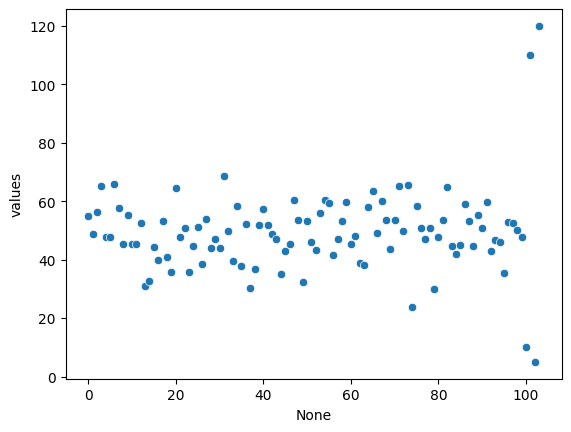

In [ ]:
sns.scatterplot(data=df,x=df.index,y='values')

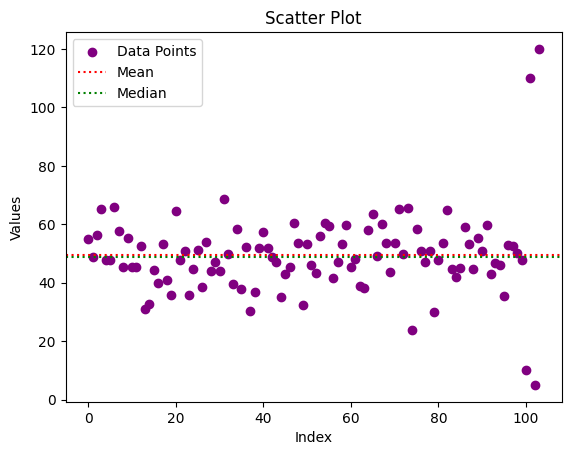

In [ ]:
plt.scatter(range(len(df)),df['values'],color="purple",label="Data Points")
plt.axhline(df['values'].mean(),color='r',linestyle=':',label="Mean")
plt.axhline(df['values'].median(),color='g',linestyle=':',label="Median")
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot')
plt.legend()
plt.show()

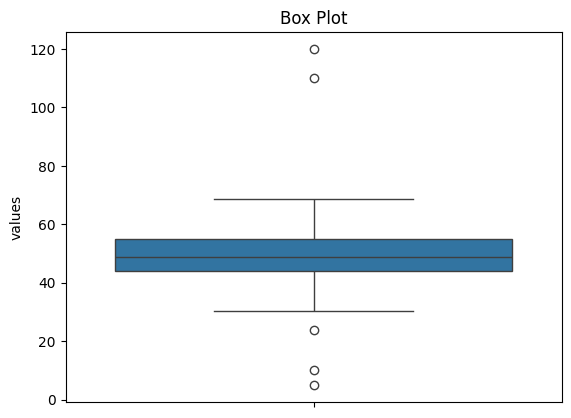

In [ ]:
sns.boxplot(data=df,y='values')
plt.title('Box Plot')
plt.show()

**Z-Score Method**

z=x-µ/õ

x=data point
µ=mean
standard deviation



In [ ]:

df['z-score'] = sc.zscore(df['values'])
df['outliers_z'] = df['z-score'].apply(lambda x: "outlier" if x > 3 or x < -3 else "normal")
df

,values,z-score,outliers_z
0,54.967142,0.395399,normal
1,48.617357,-0.058371,normal
2,56.476885,0.503289,normal
3,65.230299,1.128828,normal
4,47.658466,-0.126896,normal
...,...,...,...
99,47.654129,-0.127206,normal
100,10.000000,-2.818056,normal
101,110.000000,4.328173,outlier
102,5.000000,-3.175368,outlier


In [ ]:
q1=df['values'].quantile(0.25)
q3=df['values'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
q1,q3,iqr,lb,ub

(43.874401021766715,
 55.00852473036764,
 11.134123708600924,
 27.17321545886533,
 71.70971029326903)

**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:

Minimum (Q0) → The smallest value in the dataset.

First Quartile (Q1) → The 25th percentile (lower quartile).

Median (Q2) → The 50th percentile (middle value).

Third Quartile (Q3) → The 75th percentile (upper quartile).

Maximum (Q4) → The largest value in the dataset.


**IQR formula :**

IQR = Q3-Q1

-Q1 is 25th percentile

-Q3 is 75th percentile

  lower-bound = Q1-1.5IQR
  
  upper-bound = Q3+1.5IQR

In [ ]:
x=df[(df['values']<lb)  | (df['values']>ub)]
x

In [ ]:
fd=pd.DataFrame({
    'age' : [22,25,27,28,30,35,40,45,50,55,60,65,70],
    'Income' : [20000,25000,27000,32000,35000,38000,40000,42000,43000,45000,50000,55000,60000],
    'class' : ['h','l','l','h','h','l','h','h','l','l','h','h','l']
})
fd

In [ ]:
fd_high=fd[fd['class']=='h']
fd_low=fd[fd['class']=='l']

print(fd_high)
print()
print(fd_low)

fd

In [ ]:
fd_high_down_sampled=resample(fd_high,replace=False,n_samples=len(fd_low),random_state=42)

fd_balanced=pd.concat([fd_high_down_sampled,fd_low])
fd_balanced



In [ ]:
###################################################################################################################

SMOTE to generate synthetic

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection